In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [1]:
#manual ann
import numpy as np

# -----------------------------
# Sigmoid Activation Function
# -----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# -----------------------------
# Mean Squared Error Loss
# -----------------------------
def loss(y_hat_1, y1, y_hat_2, y2):
    return 0.5 * ((y_hat_1 - y1) ** 2 + (y_hat_2 - y2) ** 2)

# -----------------------------
# Initial Values
# -----------------------------
weights = (0.12, 0.16, 0.20, 0.24, 0.28, 0.32, 0.36, 0.40)
bias = (0.50, 0.60)
inputs = (0.04, 0.08)
y_values = (0.15, 0.85)

# -----------------------------
# Backward Propagation
# -----------------------------
def backward_propagation(inputs, weights, bias, y_values, hidden_layers, output_layers):

    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    i1, i2 = inputs
    y1, y2 = y_values
    h1_out, h2_out = hidden_layers
    o1_out, o2_out = output_layers

    lr = 0.5

    # Output layer gradients
    dw5 = (o1_out - y1) * o1_out * (1 - o1_out) * h1_out
    dw7 = (o1_out - y1) * o1_out * (1 - o1_out) * h2_out
    dw6 = (o2_out - y2) * o2_out * (1 - o2_out) * h1_out
    dw8 = (o2_out - y2) * o2_out * (1 - o2_out) * h2_out

    # Hidden layer gradients
    dh1 = ((o1_out - y1) * o1_out * (1 - o1_out) * w5 +
           (o2_out - y2) * o2_out * (1 - o2_out) * w6)

    dh2 = ((o1_out - y1) * o1_out * (1 - o1_out) * w7 +
           (o2_out - y2) * o2_out * (1 - o2_out) * w8)

    dw1 = dh1 * h1_out * (1 - h1_out) * i1
    dw3 = dh1 * h1_out * (1 - h1_out) * i2
    dw2 = dh2 * h2_out * (1 - h2_out) * i1
    dw4 = dh2 * h2_out * (1 - h2_out) * i2

    # Update weights
    new_weights = (
        w1 - lr * dw1,
        w2 - lr * dw2,
        w3 - lr * dw3,
        w4 - lr * dw4,
        w5 - lr * dw5,
        w6 - lr * dw6,
        w7 - lr * dw7,
        w8 - lr * dw8
    )

    print("\n\t-Backward Propagation-\n")
    for i in range(8):
        print(f"old w{i+1}: {weights[i]:.5f}  new w{i+1}: {new_weights[i]:.5f}")

    return new_weights

# -----------------------------
# Forward Propagation
# -----------------------------
def forward_propagation(inputs, weights, bias, y_values):

    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    b1, b2 = bias
    i1, i2 = inputs
    y1, y2 = y_values

    # Hidden layer
    h1 = i1 * w1 + i2 * w3 + b1
    h2 = i1 * w2 + i2 * w4 + b1
    h1_out = sigmoid(h1)
    h2_out = sigmoid(h2)

    # Output layer
    o1 = h1_out * w5 + h2_out * w7 + b2
    o2 = h1_out * w6 + h2_out * w8 + b2
    o1_out = sigmoid(o1)
    o2_out = sigmoid(o2)

    print("\n\t-Forward Propagation-\n")
    print(f"h1: {h1:.5f}  h1_out: {h1_out:.5f}")
    print(f"h2: {h2:.5f}  h2_out: {h2_out:.5f}")
    print(f"o1: {o1:.5f}  o1_out: {o1_out:.5f}")
    print(f"o2: {o2:.5f}  o2_out: {o2_out:.5f}")

    print("\nLoss:", loss(o1_out, y1, o2_out, y2).round(6))

    return backward_propagation(
        inputs,
        weights,
        bias,
        y_values,
        (h1_out, h2_out),
        (o1_out, o2_out)
    )

# -----------------------------
# Run ONE training step
# -----------------------------
weights = forward_propagation(inputs, weights, bias, y_values)



	-Forward Propagation-

h1: 0.52080  h1_out: 0.62733
h2: 0.52560  h2_out: 0.62846
o1: 1.00190  o1_out: 0.73143
o2: 1.05213  o2_out: 0.74118

Loss: 0.174952

	-Backward Propagation-

old w1: 0.12000  new w1: 0.11988
old w2: 0.16000  new w2: 0.15985
old w3: 0.20000  new w3: 0.19976
old w4: 0.24000  new w4: 0.23969
old w5: 0.28000  new w5: 0.24417
old w6: 0.32000  new w6: 0.32655
old w7: 0.36000  new w7: 0.32411
old w8: 0.40000  new w8: 0.40656


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 977 (3.82 KB)

 Trainable params: 977 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6045 - loss: 0.2371
Epoch 2/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7166 - loss: 0.1967
Epoch 3/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7527 - loss: 0.1751
Epoch 4/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7774 - loss: 0.1614
Epoch 5/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.1479
Epoch 6/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.1412
Epoch 7/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8130 - loss: 0.1341
Epoch 8/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8224 - loss: 0.1282
Epoch 9/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.1304
Epoch 10/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.1280
Epoch 11/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.1265
Epoch 12/50
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

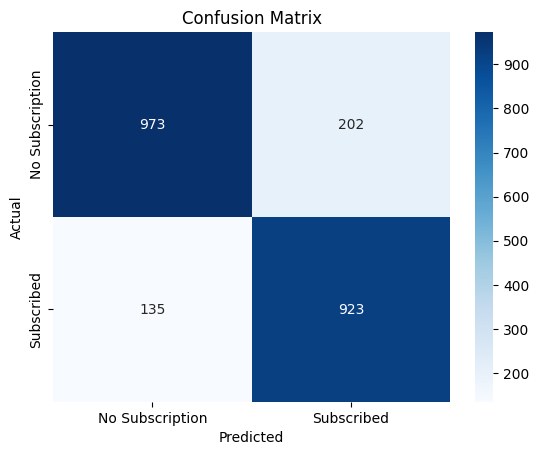

In [10]:
# ===============================
# Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# ===============================
# Load Dataset
# ===============================
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv", sep=',')
print(df.columns)

# ===============================
# Preprocessing
# ===============================
y = df['deposit'].map({'yes': 1, 'no': 0})
X = df.drop('deposit', axis=1)
X = pd.get_dummies(X, drop_first=True)

# ===============================
# Train Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# Feature Scaling
# ===============================
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ===============================
# ANN Model with Custom Hyperparameters
# ===============================
classifier = Sequential()

classifier.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Define SGD optimizer with learning rate 0.01
sgd_optimizer = SGD(learning_rate=0.01)

classifier.compile(
    optimizer=sgd_optimizer,
    loss='mean_squared_error',  # MSE loss
    metrics=['accuracy']
)

print(classifier.summary())

# ===============================
# Train Model
# ===============================
classifier.fit(
    X_train, y_train,
    batch_size=16,  # updated batch size
    epochs=50,      # updated epochs
    verbose=1
)

# ===============================
# Predictions
# ===============================
y_pred = (classifier.predict(X_test) > 0.5)

# ===============================
# Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0,0] + cm[1,1]) / len(y_test) * 100
print("Accuracy:", accuracy)

# ===============================
# Confusion Matrix Plot
# ===============================
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Subscription','Subscribed'],
            yticklabels=['No Subscription','Subscribed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
# Sample test customer
sample = pd.DataFrame({
    'age': [35],
    'job': ['technician'],
    'marital': ['married'],
    'education': ['secondary'],
    'default': ['no'],
    'balance': [1500],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular'],
    'day': [15],
    'month': ['may'],
    'duration': [300],
    'campaign': [2],
    'pdays': [-1],
    'previous': [0],
    'poutcome': ['unknown']
})

# One-hot encode same way as training data
sample_encoded = pd.get_dummies(sample, drop_first=True)

# Align columns to training data
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)

# Scale features
sample_scaled = sc.transform(sample_encoded)

# Predict probability
prob = classifier.predict(sample_scaled)[0][0]
prediction = int(prob > 0.5)

print(f"Subscription Probability: {prob:.2f}")
print(f"Predicted Class: {'Subscribed' if prediction==1 else 'Not Subscribed'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Subscription Probability: 0.67
Predicted Class: Subscribed
